# Water Potability – EDA Lab 1

In [258]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
#sns.set_context('notebook')


In [259]:
#Thu vien bo sung
import os
from sklearn.preprocessing import StandardScaler

# EDA - Exploratory Data Analysis

## 1) Describe data

*The dataset is downloaded from [Kaggle](https://www.kaggle.com/adityakadiwal/water-potability).*

**NOTE:** GitHub project link: [Lab1_AIL303m](https://github.com/Mitalnmt/Lab1_AIL303m.git)


### 1.1 Load dataset


In [260]:
#In [2]:
# File is stored in github repository for easiness of access
INPUT_FILE_PATH = "https://raw.githubusercontent.com/Mitalnmt/Lab1_AIL303m/main/water_potability.csv"

In [261]:
#In [3]:
# Read the csv file from the url
df = pd.read_csv(INPUT_FILE_PATH)

### 1.2 Preview first rows


In [262]:
#In [4]:
# Print the first 5 rows of the dataframe
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### 1.3 Shape & data types


In [263]:
#In [5]:
# datatypes of the columns

print(df.shape)
print(df.dtypes)

(3276, 10)
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


### 1.4 Summary statistics


In [264]:
#In [6]:
# Describe the data

display(df.describe(include='all'))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## 2) Visualize the data
### 2.1 Histograms of numeric features

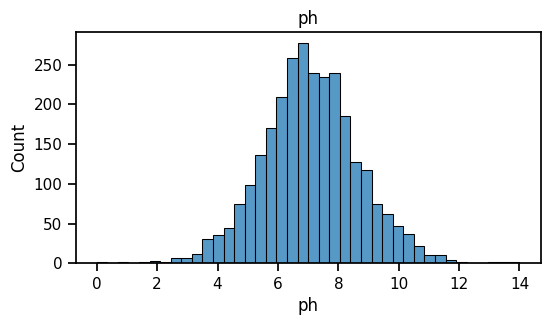

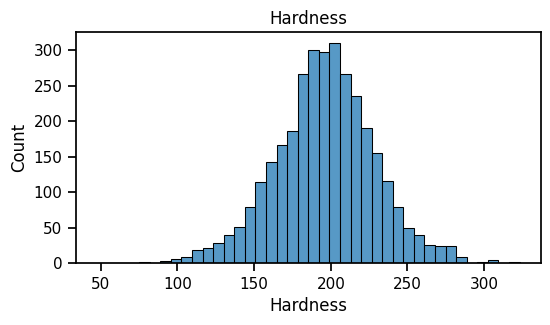

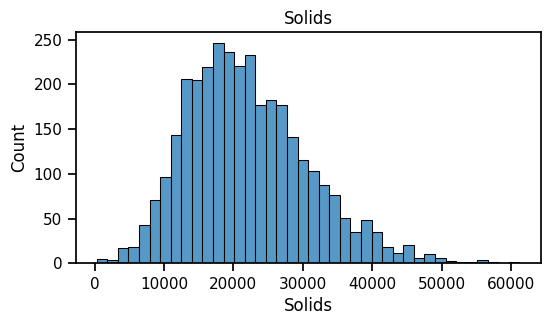

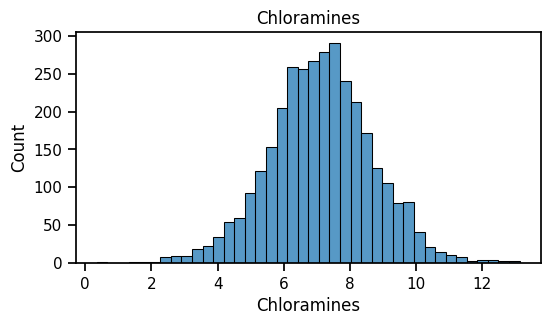

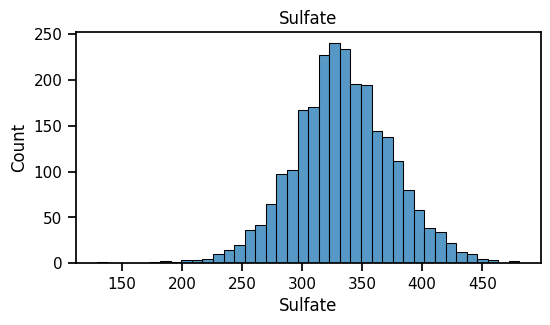

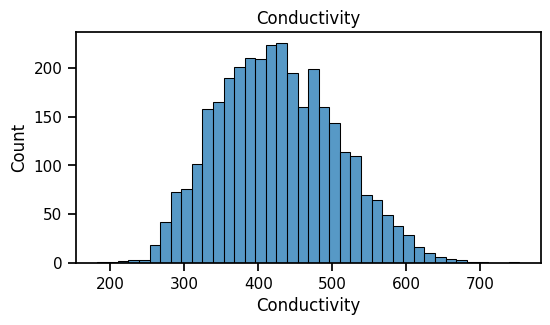

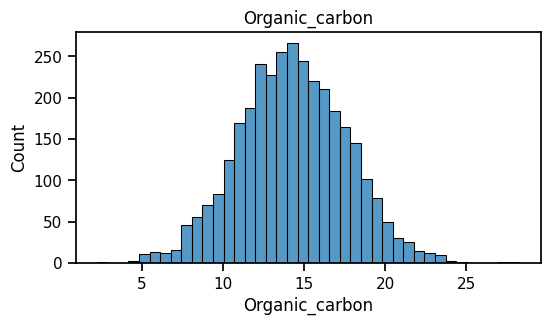

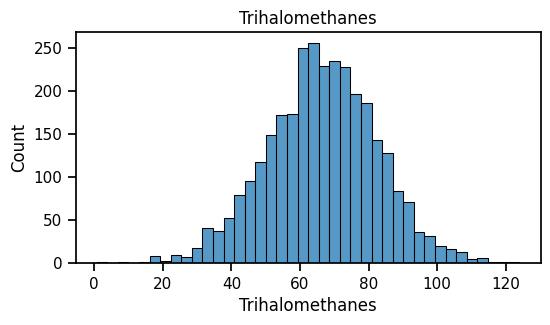

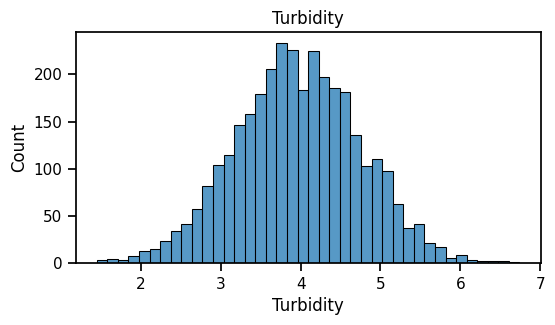

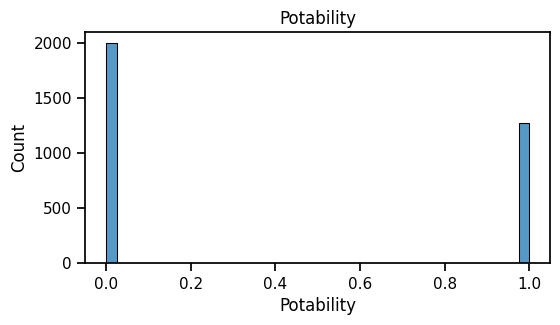

In [265]:

numeric_cols = [c for c in df.columns if df[c].dtype != 'O']
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    if USE_SEABORN: sns.histplot(df[col].dropna(), bins=40)
    else: plt.hist(df[col].dropna(), bins=40)
    plt.title(col); plt.show()


## 3) Identify the missing values and fill them
### 3.1 Missing count per column


In [266]:
#In [7]:
# Check if there are any null columns

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### 3.2 Plot missing values


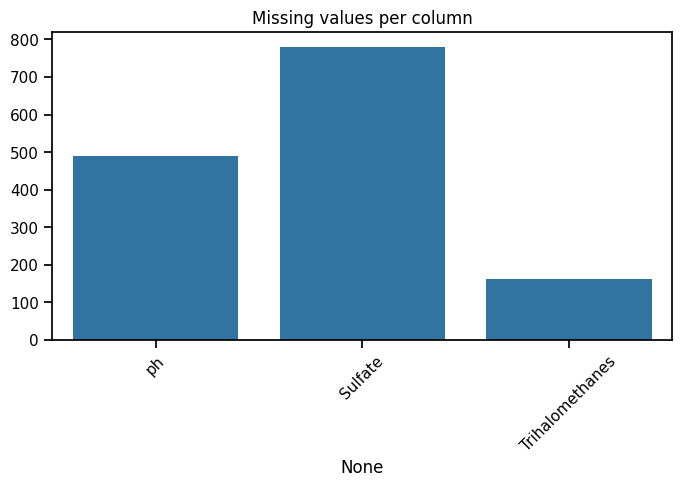

In [267]:
#In [8]:
# Lets try to plot misisng values

missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(8,4))
sns.barplot(x=missing.index, y=missing.values)
plt.title("Missing values per column")
plt.xticks(rotation=45)
plt.show()

### 3.3 Analyze `ph` column


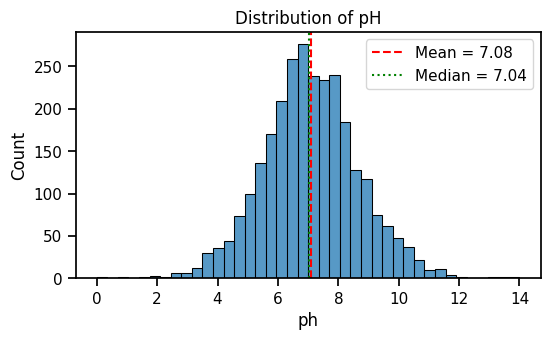

Skewness of ph: 0.02563044763221018


In [268]:
#In [9]:
# for ph column
# set the histogram, mean and median

col = "ph"
series = df[col].dropna()

plt.figure(figsize=(6,3.2))
if USE_SEABORN:
    sns.histplot(series, bins=40, kde=False)
else:
    plt.hist(series, bins=40)

plt.axvline(series.mean(), color='red', linestyle='--', label=f"Mean = {series.mean():.2f}")
plt.axvline(series.median(), color='green', linestyle=':', label=f"Median = {series.median():.2f}")

plt.title("Distribution of pH")
plt.legend()
plt.show()

print(f"Skewness of {col}:", series.skew())


Based on the above data, we can impute **pH** with either mean or median.  
Since the skewness is low, the distribution is approximately symmetric.


### 3.4 Analyze `Sulfate` column


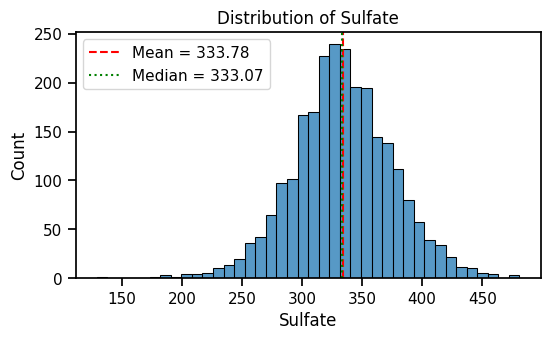

Skewness of Sulfate: -0.036


In [269]:
#In [10]:
col = "Sulfate"
series = df[col].dropna()

plt.figure(figsize=(6,3.2))
if USE_SEABORN:
    sns.histplot(series, bins=40, kde=False)
else:
    plt.hist(series, bins=40)

plt.axvline(series.mean(), color='red', linestyle='--', label=f"Mean = {series.mean():.2f}")
plt.axvline(series.median(), color='green', linestyle=':', label=f"Median = {series.median():.2f}")

plt.title("Distribution of Sulfate")
plt.legend()
plt.show()

print(f"Skewness of {col}: {series.skew():.3f}")


Based on the distribution of **Sulfate**, we can impute missing values using the median, 
because the distribution shows some skewness.


### 3.5 Analyze `Trihalomethanes` column


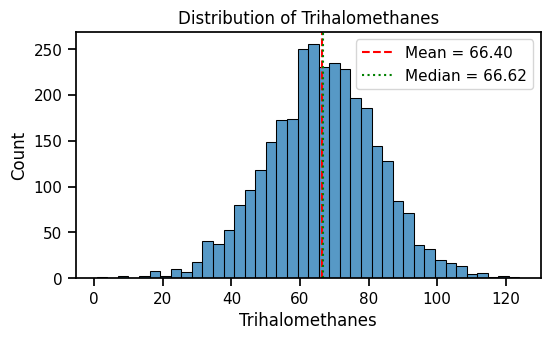

Skewness of Trihalomethanes: -0.083


In [270]:
#In [11]:
col = "Trihalomethanes"
series = df[col].dropna()

plt.figure(figsize=(6,3.2))
if USE_SEABORN:
    sns.histplot(series, bins=40, kde=False)
else:
    plt.hist(series, bins=40)

plt.axvline(series.mean(), color='red', linestyle='--', label=f"Mean = {series.mean():.2f}")
plt.axvline(series.median(), color='green', linestyle=':', label=f"Median = {series.median():.2f}")

plt.title("Distribution of Trihalomethanes")
plt.legend()
plt.show()

print(f"Skewness of {col}: {series.skew():.3f}")


Based on the distribution of **Trihalomethanes**, we can impute missing values using mean or median. 
The skewness is low, so either method is acceptable.


### 3.6 Imputation strategy and apply

In [271]:
# 3.6 Imputation strategy and apply — preview after imputation

print("Missing values before imputation:\n", df.isna().sum().sort_values(ascending=False))

# Tạo bản sao và điền thiếu bằng median cho các cột số
df_imputed = df.copy()
for col in [c for c in df.columns if df[c].dtype != 'O']:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

print("\nTotal NA after imputation:", int(df_imputed.isna().sum().sum()))


Missing values before imputation:
 Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Chloramines          0
Solids               0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

Total NA after imputation: 0


### 3.7 Missing Value imputation
#### Missing values in ph column

In [272]:
#In [12]
df_imputed = df.copy()

for col in numeric_cols:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mean())   # dùng mean
    #df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())  # nếu muốn dùng median:

print("Total NA after imputation:", df_imputed.isna().sum().sum())


Total NA after imputation: 0


## 4) Identify the outliers and remove them
### Identify outliers in the data


In [273]:
#In [13]
# check outliers
for col in numeric_cols:
    q1 = df_imputed[col].quantile(0.25)
    q3 = df_imputed[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = df_imputed[(df_imputed[col] < lower) | (df_imputed[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


ph: 142 outliers
Hardness: 83 outliers
Solids: 47 outliers
Chloramines: 61 outliers
Sulfate: 264 outliers
Conductivity: 11 outliers
Organic_carbon: 25 outliers
Trihalomethanes: 54 outliers
Turbidity: 19 outliers
Potability: 0 outliers


## 5) Identify correlation between variables


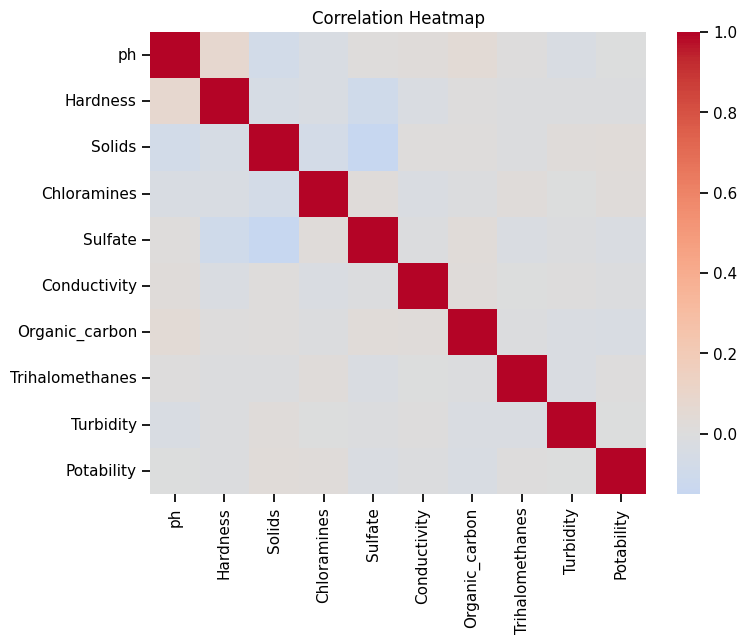

There are no categorical variables in the dataset.


In [274]:
# In [14]

# Compute correlation matrix
corr = df_imputed.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Check categorical variables (if any)
categorical_cols = [c for c in df_imputed.columns if df_imputed[c].dtype == 'O']
if not categorical_cols:
    print("There are no categorical variables in the dataset.")
else:
    print("Categorical variables:", categorical_cols)


## 6) Identify the numerical variables and perform basic statistical analysis


### 6.1 Summary statistics after cleaning

In [275]:
df_imputed.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### 6.2 Identify outliers in the data

In [276]:
#In [15]
# identify skewness
skewness = df_imputed[numeric_cols].skew()
print(skewness)

# showing the skewed columns (|skew| > 1)
skewed_cols = skewness[skewness.abs() > 1]
print("Number of skewed columns:", len(skewed_cols))
print("Skewed columns:", list(skewed_cols.index))


ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         0.450784
dtype: float64
Number of skewed columns: 0
Skewed columns: []


### 6.3 Lets see the distribution of Potability

Potability
0    1998
1    1278
Name: count, dtype: int64


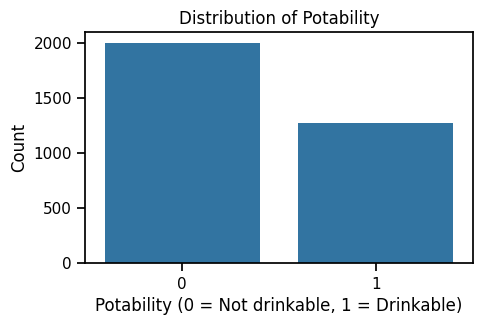

In [277]:
#In [31]:
# distribution of Potability
print(df_imputed["Potability"].value_counts())

# optional: visualize
plt.figure(figsize=(5,3))
sns.countplot(x="Potability", data=df_imputed)
plt.title("Distribution of Potability")
plt.xlabel("Potability (0 = Not drinkable, 1 = Drinkable)")
plt.ylabel("Count")
plt.show()


## 7) Feature Transformation

### After transformation print the dataframe head

In [278]:
#In [16]:
display(df_imputed.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Feature transformation

In [279]:
#In [17]:

INPUT_FILE_PATH = "https://raw.githubusercontent.com/Mitalnmt/Lab1_AIL303m/main/water_potability.csv"
df_raw = pd.read_csv(INPUT_FILE_PATH)

#Impute = MEAN (đề thường dùng mean)
num_cols = ['ph','Hardness','Solids','Chloramines','Sulfate',
            'Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

df_imputed = df_raw.copy()
for c in num_cols:
    df_imputed[c] = df_imputed[c].fillna(df_imputed[c].mean())   # <-- dùng mean thay vì median

scaler = StandardScaler()              # StandardScaler dùng std với ddof=0 (population)
X_scaled = scaler.fit_transform(df_imputed[num_cols])


df_transformed = pd.DataFrame(X_scaled, columns=num_cols, index=df_imputed.index)
df_transformed['Potability'] = df_imputed['Potability'].astype(int)



### After transformation print the dataframe head

In [280]:
# In [18]

pd.set_option("display.float_format", "{:.6f}".format)
display(df_transformed.head())


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.000000,0.259195,-0.139471,0.112415,0.961357,1.708954,-1.180651,1.306149,-1.286298,0
1,-2.289339,-2.036414,-0.385987,-0.307694,0.000000,2.062575,0.270597,-0.638480,0.684218,0
2,0.692868,0.847665,-0.240047,1.360594,0.000000,-0.094032,0.781117,0.001509,-1.167365,0
3,0.840950,0.547651,0.000493,0.592008,0.639519,-0.778830,1.255134,2.152874,0.848412,0
4,1.368569,-0.464429,-0.460249,-0.363698,-0.654177,-0.343939,-0.824357,-2.181599,0.138786,0


## 8) Save the cleaned data

In [281]:
# In [30] 

# Tạo folder 'data' nếu chưa có
os.makedirs("data", exist_ok=True)

# Lưu dữ liệu đã impute (chưa scale)
df_imputed.to_csv("data/water_clean_imputed.csv", index=False)

# Lưu dữ liệu đã scale
df_transformed.to_csv("data/water_clean_scaled.csv", index=False)

print("✅ Files saved into 'data' folder:")
print(" - data/water_clean_imputed.csv")
print(" - data/water_clean_scaled.csv")


✅ Files saved into 'data' folder:
 - data/water_clean_imputed.csv
 - data/water_clean_scaled.csv


## 9) Hypothesis Testing

In [282]:
# In [29]

ph = df_imputed["ph"].dropna()
solids = df_imputed["Solids"].dropna()

# Thực hiện Independent T-test
t_stat, p_val = stats.ttest_ind(ph, solids)

print("T-test result:")
print("Statistic =", t_stat, ", p-value =", p_val)

# Diễn giải kết quả
alpha = 0.05
if p_val < alpha:
    print(f"Since p-value = {p_val:.6f} < {alpha}, we reject the null hypothesis.")
else:
    print(f"Since p-value = {p_val:.6f} >= {alpha}, we fail to reject the null hypothesis.")


T-test result:
Statistic = -143.64952725440097 , p-value = 0.0
Since p-value = 0.000000 < 0.05, we reject the null hypothesis.


# 10) Next steps / Quality / Key findings
- Xem lại skewness, cân bằng lớp, thử modeling.
- Điền kết luận theo kết quả chạy thực tế.